In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the IRIS csv file
data= pd.read_csv('/content/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
iris_setosa=data.loc[data['species']=='setosa']
iris_virginica=data.loc[data['species']=='virginica']
iris_versicolor=data.loc[data['species']=='versicolor']

In [ ]:
# @title Measure of Central Tendency


In [ ]:
# @title 1. Mean


In [ ]:
print(np.mean(iris_setosa['sepal_width']))
print(np.mean(iris_virginica['sepal_width']))
print(np.mean(iris_versicolor['sepal_width']))

3.418
2.974
2.7700000000000005


In [ ]:
print(np.mean(iris_setosa['sepal_length']))
print(np.mean(iris_virginica['sepal_length']))
print(np.mean(iris_versicolor['sepal_length']))

5.006
6.587999999999998
5.936


In [ ]:
print(np.mean(iris_setosa['petal_length']))
print(np.mean(iris_virginica['petal_length']))
print(np.mean(iris_versicolor['petal_length']))

1.464
5.5520000000000005
4.26


In [ ]:
print(np.mean(iris_setosa['petal_width']))
print(np.mean(iris_virginica['petal_width']))
print(np.mean(iris_versicolor['petal_width']))

0.244
2.0260000000000002
1.3259999999999998


In [ ]:
# @title The problem of Outliers


(array([ 1.,  1.,  2.,  7., 12., 14.,  7.,  4.,  0.,  2.]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <BarContainer object of 10 artists>)

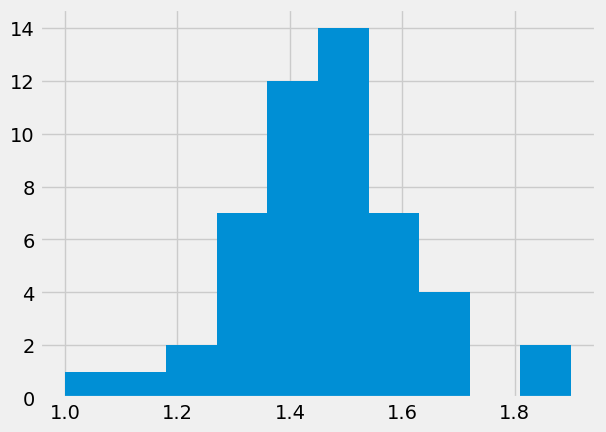

In [ ]:
# Range of Setosa Petal width is betweeen 1 to 2
plt.hist(iris_setosa['petal_length'])

In [ ]:
# If we add an outlier of 50 at the end
np.mean(np.append(iris_setosa['petal_length'],50))

2.4156862745098038

In [ ]:
# @title 2. Median


In [ ]:
print(np.median(iris_setosa['petal_length']))
print(np.median(iris_virginica['petal_length']))
print(np.median(iris_versicolor['petal_length']))

1.5
5.55
4.35


In [ ]:
# @title The good thing about median


In [ ]:
np.median(np.append(iris_setosa['petal_length'],50))

1.5

In [ ]:
# @title 3. Mode


In [ ]:
from scipy import stats

In [ ]:
print(stats.mode(iris_setosa['petal_length']))
print(stats.mode(iris_virginica['petal_length']))
print(stats.mode(iris_versicolor['petal_length']))

ModeResult(mode=1.5, count=14)
ModeResult(mode=5.1, count=7)
ModeResult(mode=4.5, count=7)


In [ ]:
# @title Which one should we use?
# @markdown we should use all 3 to have a fair idea of the centrality of the data
# @markdown >PDF and CDF
# @markdown - PDF(Probablity Distribution Functions)
# @markdown >1. PMF(Probablity Mass Function)(Discrete Random Variable)
# @markdown >2. PDF(Probablity Density Function)(Cont. Random Variable)
# @markdown - CDF(Cumulative Distribution Function)

In [ ]:
# @title CDF


In [ ]:
s=pd.Series([1,2,3,4,5,6,7,8])
s

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
dtype: int64

In [ ]:
s.cumsum()

0     1
1     3
2     6
3    10
4    15
5    21
6    28
7    36
dtype: int64

In [ ]:
from scipy.stats import binom

In [ ]:
binom.pmf(25,50,1/2)*100

11.227517265921712

In [ ]:
# @title Histogram is problematic that's why PDF came into picture


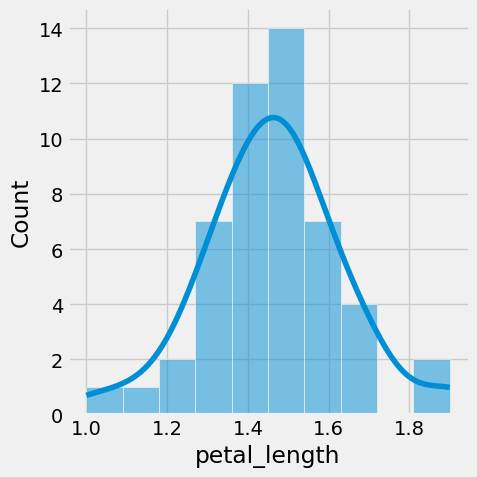

In [ ]:
sns.displot(iris_setosa['petal_length'], kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

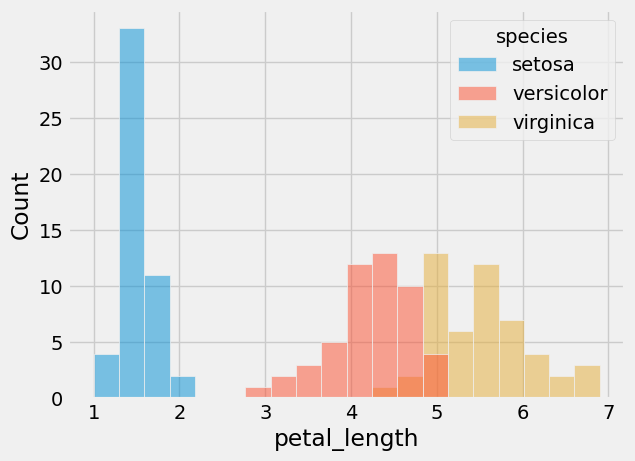

In [ ]:
sns.histplot(x='petal_length',data=data,kde=False,hue='species',bins=20)

<Axes: xlabel='petal_length', ylabel='Count'>

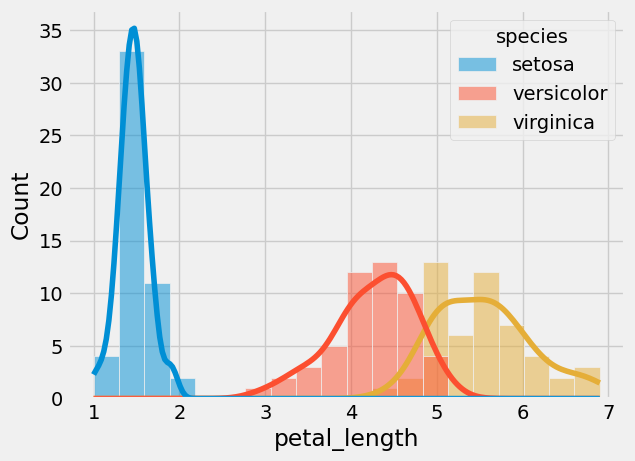

In [ ]:
sns.histplot(x='petal_length',data=data,kde=True,hue='species',bins=20)

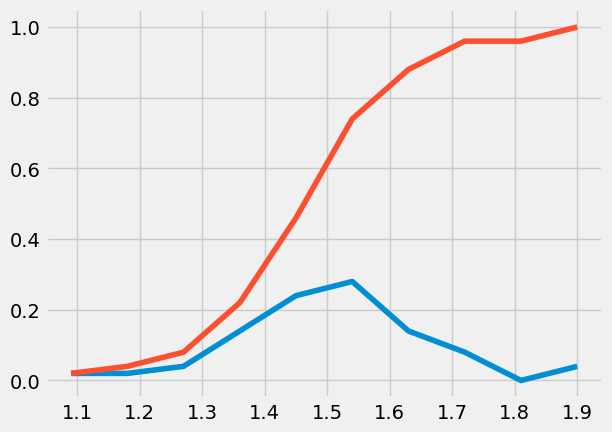

In [ ]:
plt.style.use('fivethirtyeight')
counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [ ]:
np.histogram(iris_setosa['petal_length'],bins=10)

(array([ 1,  1,  2,  7, 12, 14,  7,  4,  0,  2]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]))

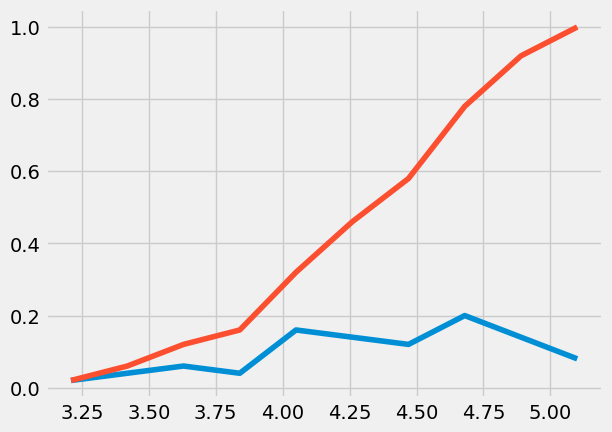

In [ ]:
plt.style.use('fivethirtyeight')
counts,bin_edges=np.histogram(iris_versicolor['petal_length'],bins=10)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [ ]:
# @title Measure of Spread


In [ ]:
# @title 1. Range
# @markdown The Range describes the difference between the largest and the smallest points in the data.

In [ ]:
r=np.max(iris_setosa['petal_length'])-np.min(iris_setosa['petal_length'])
print('The range is',r)

The range is 0.8999999999999999


In [ ]:
# @title 2.Percentiles
# @markdown A Percentile is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations falls.For example,the 20th percentile is the value below which 20% of observation may be found.


In [ ]:
np.percentile(iris_setosa['petal_length'],95)

1.7

In [ ]:
# @title 3. Quartiles
# @markdown Quartiles are the values that divide a list of numbers into quarters:
# @markdown - Lower quartile (Q1)
# @markdown - Middle quartile(median) (Q2)
# @markdown - Upper quartile (Q3)

In [ ]:
print(np.percentile(iris_setosa['petal_length'],25))  #Q1
print(np.percentile(iris_setosa['petal_length'],50))  #Q2
print(np.percentile(iris_setosa['petal_length'],75))  #Q3
print(np.percentile(iris_setosa['petal_length'],100))

1.4
1.5
1.5750000000000002
1.9


In [ ]:
# @title 4. Interquartile Range
# @markdown The interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [ ]:
iqr=np.percentile(iris_setosa['petal_length'],75)-np.percentile(iris_setosa['petal_length'],25)
print('The IQR is',iqr)

The IQR is 0.17500000000000027


In [ ]:
# @title 5. Mean Absolute Deviation
# @markdown The mean absolute deviation is a measure of statistical dispersion, being equal to the average of the absolute differences between each data point and the mean.

In [ ]:
# @title 6. Variance
# @markdown Variance is a measure of statistical dispersion, being equal to the average of the squared differences from the mean.


In [ ]:
np.var(iris_setosa['petal_length'])

0.029504000000000002

In [ ]:
# @title The problem with Variance
# @markdown The problem with Variance is that because of the squaring,it is not in the same unit of measurement as the original data.


In [ ]:
# @title 7. Variance vs Mean Absolute Deviation
# @markdown Variance is easy to work with in comparison to MAD as it works on squaring(a smooth function) the deviation in comparison to MAD where we use modulus(a non smooth function).


In [ ]:
# @title 8. Standard Deviation
# @markdown The standard deviation is a measure of statistical dispersion, being equal to the square root of the variance.


In [ ]:
np.std(iris_setosa['petal_length'])

0.17176728442867112

In [ ]:
# @title 9. Median Absolute Deviation
# @markdown The median absolute deviation is a measure of statistical dispersion, being equal to the median of the absolute differences between each data point and the median.


In [ ]:
from statsmodels import robust
robust.mad(iris_setosa['petal_length'])

0.14826022185056031

In [ ]:
# @title 10. Standard Deviation Vs Median Absolute Deviation
# @markdown Just like mean vs median,Median Absolute Deviation is free from the effects of outliers from which Standard Deviation can suffer.

In [ ]:
# @title 11. Box Plots
# @markdown Box plots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median(Q2), third quartile (Q3), and “maximum”).


<Axes: xlabel='species', ylabel='petal_length'>

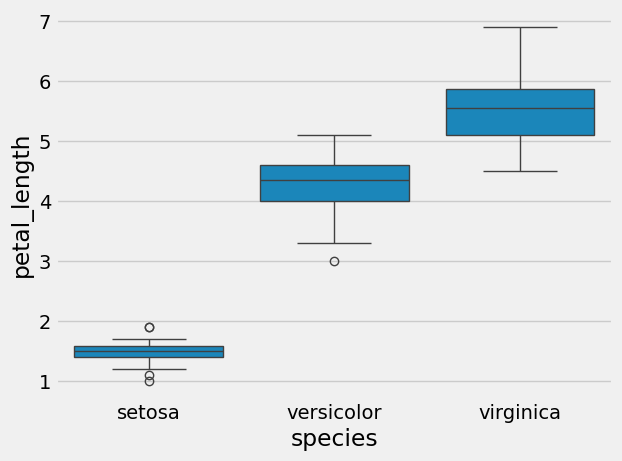

In [ ]:
sns.boxplot(x='species',y='petal_length',data=data)

In [ ]:
# @title Measure of Asymmetry
# @markdown Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.


In [ ]:
# @title 1. Positive Skew Example


In [ ]:
# Reading the IPL CSV file
df=pd.read_csv('/content/deliveries (2).csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


1.913647879822431


<Axes: xlabel='batsman_runs', ylabel='Density'>

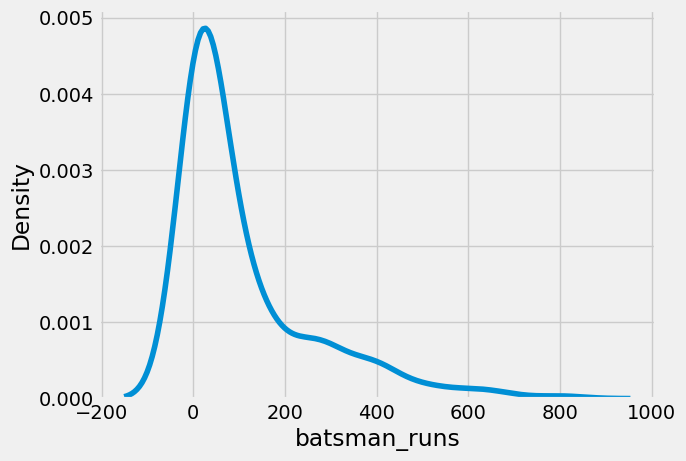

In [ ]:
# Career runs of all the batsman
runs=df.groupby('batsman')['batsman_runs'].sum()
print(runs.skew())
sns.kdeplot(runs)
# print(runs)

2.181621214549199


<Axes: xlabel='count', ylabel='Density'>

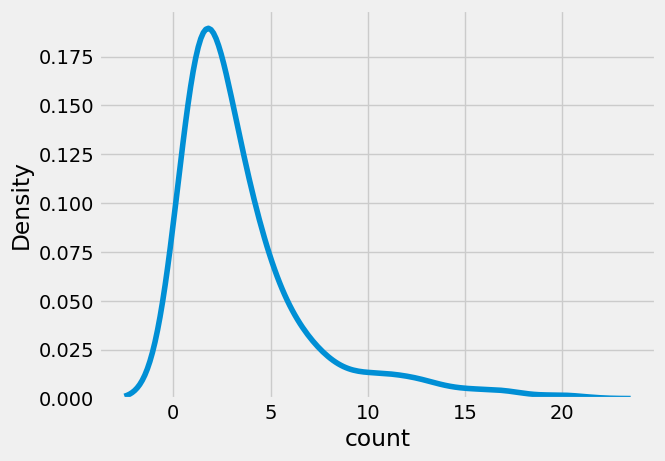

In [ ]:
x=df['fielder'].value_counts()
print(x.skew())
sns.kdeplot(x)

In [ ]:
# @title 2.Negative Skew Example


In [ ]:
# Reading the Life Expectancy data csv file
df1=pd.read_csv('/content/Life Expectancy Data.csv')
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


-0.6386047358773552


<Axes: xlabel='Life expectancy ', ylabel='Density'>

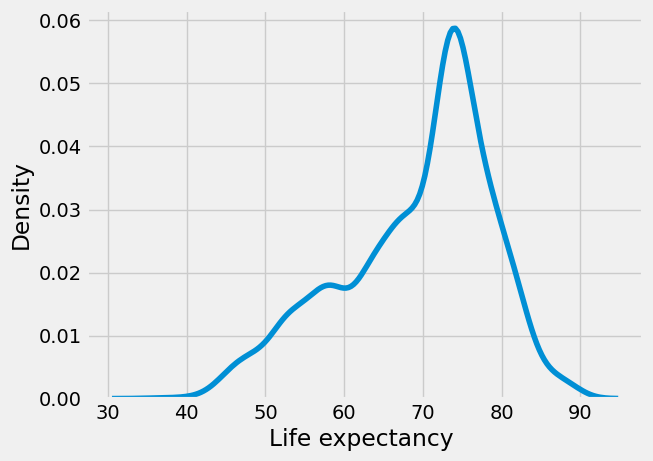

In [ ]:
print(df1['Life expectancy '].skew())
sns.kdeplot(df1['Life expectancy '])

In [ ]:
# @title SO,when is the skewness too much?
# @markdown The rule of thumb seems to be:
# @markdown - If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
# @markdown - If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
# @markdown - If the skewness is less than -1 or greater than 1, the data are highly skewed.
